# Code to take data using the scope and plot relevant histograms. Will output energy resolution and associated errors.

In [1]:
import os
import sys
import pyvisa as visa
from datetime import datetime

import importlib
import h5py # This is the python library that creates files/stores data sets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

#Local scripts
import MSO4102Bastro as sdaq # This is the scope module that Sean G. wrote. You will need this module (should be on GitHub, https://github.com/ibrewer/scope-daq)
import readData

### Enter the IP address of the scope as a string. The IP address of the scope should be set by the router (make sure both the scope and the lab laptop are plugged into the router). To check the IP address of the scope, you can go to the Utility menu and check the LAN settings. Sometimes a LAN reset is required.

Define output file and data set names

In [2]:
#define readout pixel
AMP=2

source="Cobalt57"
additionalName = "weekend"

dsName='run1'

triggerThreshold_inj=100
triggerThreshold_source=15 #mV

traces=100
minutes=60*(10+48+9)
#minutes=1

outName=f"{additionalName}_{source}_{minutes}min"

savePlots=True 
testTrigger=False

current_time = datetime.now()
today = current_time.strftime('%m%d%y')
path=f'../dataOut/{today}_amp{AMP}/'
if not os.path.exists(path):
    os.makedirs(path)
    
offSets = [538, 538, 0, 0] #scope offsets in mV

In [3]:
scope = sdaq.Scope(address="169.254.2.185")
scope.set_source_channel(AMP)
scope.get_source_channel(True)

#injection run: Triggering on channel 3, 100 mV 
if "inj" in source:
    scope.set_trigger(3, triggerThreshold_inj, edge="FALL") 
#source run
else:
    threshold = offSets[AMP-1] + triggerThreshold_source
    print(threshold)
    scope.set_trigger(AMP, threshold, edge="RIS")

trigger_dict = scope.get_trigger_config()
print(trigger_dict)
scaling_dict = scope.read_scaling_config()


Data source channel: 2
553
{'EDGE:SOURCE': 'CH2', 'EDGE:SLOPE': 'RIS', 'LEVEL': '553.0000E-3'}


In [4]:
#test trigger settings
if testTrigger:
    
    readData.get_data(path, outName, scope, 1, dsName+"_triggerTest", 1, overwrite=True, useTraceLimit=True) # take data
    
    with h5py.File(path+outName+'.h5py', 'a') as f:
        plot_array = f[dsName+"_triggerTest"] # insert desired data set name here
        time_axis = np.array(f[dsName+"_triggerTest_t"])
        baseline = f[dsName + "_triggerTest_baseline"]
    
        plt.plot(time_axis*1e6, plot_array[0])
        plt.axhline(float(trigger_dict["LEVEL"])-float(baseline[0]), color="r", ls="--")
    
        #clean up
        for name in ["", "+t", "_peaks", "_integral", "_baseline", "_peakTime"]: 
            if (dsName + "_triggerTest" + name) in f:
                del f[dsName + "_triggerTest"  + name]
    raise SystemExit("check trigger settings!")
    

### This command creates a h5py file, desginated as "f." Documentation for h5py can be found at http://docs.h5py.org/en/stable/. 
### NOTE: Please keep the 'a' flag.  ***Also, make sure you close an open file (use f.close()) before you open a new one.***

In [5]:
f = h5py.File(path+outName+'.h5py', 'a')

In [6]:
#save trigger settings
trigger_data = []
for key, value in trigger_dict.items():
    trigger_data.append([key, value])
f.create_dataset(dsName+"_triggerSettings", data=trigger_data)

<HDF5 dataset "run3_triggerSettings": shape (3, 2), type "|O">

### Create an array that stores the scope scaling dictionary. This will make sure that we have the scope settings for any given run.

### If you want to extract the scope scaling parameters from a file, the 5 settings are stored in the order [x zero, x incr, y zero, y mult, y offset].
### To extract the data, you could say ***data_scale = f['scope_scaling']*** and then extract the values that you want using ***data_scale[1] = x_increment***, for example.

In [7]:
scaling_info = np.zeros(5)
scaling_info[0] = float(scaling_dict['XZERO'])
scaling_info[1] = float(scaling_dict['XINCR'])
scaling_info[2] = float(scaling_dict['YZERO'])
scaling_info[3] = float(scaling_dict['YMULT'])
scaling_info[4] = float(scaling_dict['YOFF'])

dset = f.create_dataset(dsName+'_scaling', data=scaling_info)

### Meta-data storing dictionary
Some things you will want to update depending on your run

In [8]:
metadata = []
metadata.append(['bias voltage [V]','60']) #from HV power supply
metadata.append(['blres','5'])
metadata.append(['vn1','4'])
metadata.append(['vnfb','1']) #gain
metadata.append(['vnfoll','1'])
metadata.append(['vn2','0'])
metadata.append(['vnfoll2','5'])
metadata.append(['vnbias','5'])
metadata.append(['vpload','2'])
metadata.append(['vncomp','0']) #should always be 0
#for dark runs
metadata.append(['dark','N'])

f.create_dataset(dsName+'_metaData',data=metadata)

<HDF5 dataset "run3_metaData": shape (11, 2), type "|O">

### Actually take data. Function inputs:
1) Length of run [minutes]

2) Name of dataset saved

3) Number of full traces saved (optional)

4) Noise range of points on trace (optional)

5) Signal range of points on scope (optional)

In [9]:
f.close()
readData.get_data(path, outName,scope, minutes, dsName, traces) # take data

Starting 1 minute run; will be done at Fri, 12 Nov 2021 15:42:08
Communication timeout... 1
Communication timeout... 2
Communication timeout... 3
Communication timeout... 4
Communication timeout... 5
Communication timeout... 6
Communication timeout... 7
Communication timeout... 8
Communication timeout... 9
Communication timeout... 10
Communication timeout... 11
Communication timeout... 12
Communication timeout... 13
Communication timeout... 14
Communication timeout... 15
Communication timeout... 16
Communication timeout... 17
Communication timeout... 18
Communication timeout... 19
Communication timeout... 20
Communication timeout... 21
Communication timeout... 22
Communication timeout... 23
Communication timeout... 24
Communication timeout... 25
Communication timeout... 26
Communication timeout... 27
Communication timeout... 28
Communication timeout... 29
Communication timeout... 30
Communication timeout... 31
Communication timeout... 32
Communication timeout... 33
Communication timeou

Communication timeout... 5000
Communication timeout... 6000
Communication timeout... 7000
Communication timeout... 8000
Communication timeout... 9000
Communication timeout... 10000
Communication timeout... 11000
Communication timeout... 12000
Communication timeout... 13000
Communication timeout... 14000
Communication timeout... 15000
Communication timeout... 16000
Communication timeout... 17000
Communication timeout... 18000
Communication timeout... 19000
Communication timeout... 20000
Communication timeout... 21000
Communication timeout... 22000
Communication timeout... 23000
Communication timeout... 24000
Communication timeout... 25000
Communication timeout... 26000
Communication timeout... 27000
Communication timeout... 28000
Communication timeout... 29000
Communication timeout... 30000
Communication timeout... 31000
Communication timeout... 32000
Communication timeout... 33000
Communication timeout... 34000
Communication timeout... 35000
Communication timeout... 36000
Communication

Communication timeout... 273000
Communication timeout... 274000
Communication timeout... 275000
Communication timeout... 276000
Communication timeout... 277000
Communication timeout... 278000
Communication timeout... 279000
Communication timeout... 280000
Communication timeout... 281000
Communication timeout... 282000
Communication timeout... 283000
Communication timeout... 284000
Communication timeout... 285000
Communication timeout... 286000
Communication timeout... 287000
Communication timeout... 288000
Communication timeout... 289000
Communication timeout... 290000
Communication timeout... 291000
Communication timeout... 292000
Communication timeout... 293000
Communication timeout... 294000
Communication timeout... 295000
Communication timeout... 296000
Communication timeout... 297000
Communication timeout... 298000
Communication timeout... 299000
Communication timeout... 300000
Communication timeout... 301000
Communication timeout... 302000
Communication timeout... 303000
Communic

Communication timeout... 539000
Communication timeout... 540000
Communication timeout... 541000
Communication timeout... 542000
Communication timeout... 543000
Communication timeout... 544000
Communication timeout... 545000
Communication timeout... 546000
Communication timeout... 547000
Communication timeout... 548000
Communication timeout... 549000
Communication timeout... 550000
Communication timeout... 551000
Communication timeout... 552000
Communication timeout... 553000
Communication timeout... 554000
Communication timeout... 555000
Communication timeout... 556000
Communication timeout... 557000
Communication timeout... 558000
Communication timeout... 559000
Communication timeout... 560000
Communication timeout... 561000
Communication timeout... 562000
Communication timeout... 563000
Communication timeout... 564000
Communication timeout... 565000
Communication timeout... 566000
Communication timeout... 567000
Communication timeout... 568000
Communication timeout... 569000
Communic

Communication timeout... 804000
Communication timeout... 805000
Communication timeout... 806000
Communication timeout... 807000
Communication timeout... 808000
Communication timeout... 809000
Communication timeout... 810000
Communication timeout... 811000
Communication timeout... 812000
Communication timeout... 813000
Communication timeout... 814000
Communication timeout... 815000
Communication timeout... 816000
Communication timeout... 817000
Communication timeout... 818000
Communication timeout... 819000
Communication timeout... 820000
Communication timeout... 821000
Communication timeout... 822000
Communication timeout... 823000
Communication timeout... 824000
Communication timeout... 825000
Communication timeout... 826000
Communication timeout... 827000
Communication timeout... 828000
Communication timeout... 829000
Communication timeout... 830000
Communication timeout... 831000
Communication timeout... 832000
Communication timeout... 833000
Communication timeout... 834000
Communic

In [10]:
#alert when run is finished
sound_file = './beep-09.wav'
Audio(sound_file, autoplay=True)

### List the data sets within a file (check to make sure your run is there):

In [11]:
f = h5py.File(path+outName+'.h5py', 'r')
list(f.keys())

['run3',
 'run3_baseline',
 'run3_integral',
 'run3_metaData',
 'run3_peakTime',
 'run3_peaks',
 'run3_scaling',
 'run3_t',
 'run3_trigTime',
 'run3_triggerSettings']

### Data analysis/plotting: assign the data set as the array "plot_array."

In [12]:
plot_array = f[dsName] # insert desired data set name here
time_axis = np.array(f[dsName+"_t"])


#sanity check
if len(plot_array)!=traces: 
    print("ERROR - SOMETHING AWRY \n dataset length is not what was input - are you looking at the right dataset?")

ERROR - SOMETHING AWRY 
 dataset length is not what was input - are you looking at the right dataset?


### Plot 10% of all traces to look at the data and perform a common sense check. Also look for a stretch of data that can be used to determine noise.

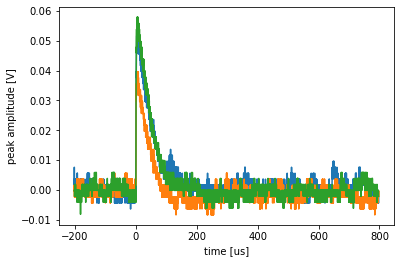

In [13]:
for i in range(len(plot_array)):
    plt.plot(time_axis*1e6, plot_array[i])
    
plt.xlabel('time [us]')
plt.ylabel('peak amplitude [V]')

if savePlots:
    plt.savefig(path+outName+'_'+dsName+'_traces.png')
    

### This function will extract the peak from each trace/row of the data set. The noise sample is determined by eye; pick a range of x values where there don't appear to be (many) peaks, ex. from 2000:3500.

In [14]:
peaks = f[dsName + '_peaks' ]
integ = f[dsName + "_integral"]

### Plot a histogram of the peaks using matplotlib to get a sense of what the data looks like and where the peak is.

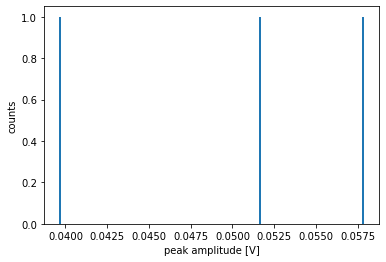

In [15]:
#ultra fine binning for debugging input
plt.hist(peaks, bins=180)
plt.xlabel('peak amplitude [V]')
plt.ylabel('counts')

#plt.yscale("log")
if savePlots:
    plt.savefig(path+outName+'_'+dsName+'_runtimePeakHist.png')


# Do the same for the trace integral

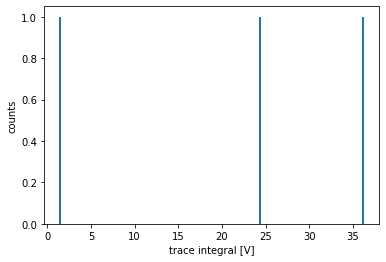

In [16]:
#ultra fine binning for debugging input
plt.hist(integ, bins=180)
plt.xlabel('trace integral [V]')
plt.ylabel('counts')
#plt.yscale("log")

if savePlots:
    plt.savefig(path+outName+'_'+dsName+'_runtimeIntegHist.png')

In [17]:
t = np.array(f["run1_trigTime"])
print(np.min(t))
print(np.max(t))
print((np.max(t) - np.min(t)) /3600 )
print(t.shape)
print( 4000%100)

KeyError: "Unable to open object (object 'run1_trigTime' doesn't exist)"

### If you are done working with a file, ***make sure you close it!*** h5py does not like it when files are left open and you change files and/or kill the kernel.

In [ ]:
f.close()

YOU DID IT!!!

In [ ]:
#manually merge output file.
#keep this here in case it's needed again.\n",
if False:
    final_data = {}
    with h5py.File(path+"_temp_" + outName+'.h5py', 'r') as tempfile:
        for name in ["_peaks", "_integral", "_baseline", "_trigTime", "_peakTime"]:
            final_data[name] = []
            for j in range(0, 696):
                final_data[name].append( np.array(tempfile["run1" + name + f"_part{j}"]) )

    #write final output data\n",
    with h5py.File(path + outName+'.h5py', 'a') as file:
        for name in ["_peaks", "_integral", "_baseline", "_trigTime", "_peakTime"]:
            if "run1" + name not in file:
                file.create_dataset("run1" + name, data= np.concatenate(final_data[name]))
            else:
                print("run1" + name, file["run1" + name].shape)